# Analysis of unstructured data - Assignment 2
## Agata Cegiełka, Damian Matusiak

The aim of this assignment was to analyse data about NFTs from Terra Network. For analysis we have chosen TerraWhales collection which consists of $1000$ items.


In [22]:
import requests, json, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
import seaborn as sns
sns.set()

import pickle

## Getting data from the website

We got all the data using the following code:

In [221]:
sesja = requests.session()
response = sesja.get("https://fcd.terra.dev/v1/txs?offset=0&limit=100&account=terra1jdt2wnfhgy4ptk6m5kxacyj0k6e8rc7e2ugulz")
todos = json.loads(response.text)

data = []

while True:
    try:
        data.extend([tx_i for tx_i in todos['txs']])
        offset = todos['next']
        sesja.cookies.clear()
        time.sleep(2)
        response = sesja.get("https://fcd.terra.dev/v1/txs?offset=%d&limit=100&account=terra1jdt2wnfhgy4ptk6m5kxacyj0k6e8rc7e2ugulz" %offset)
        todos = json.loads(response.text)
    except:
        break


To download all the data from the website we reset connection before each request and add sleep time. 

We pickled this data, so we can also get data from the file:

In [5]:
data = pickle.load( open( "whales.pkl", "rb" ) )

len(data)

11799

In [9]:
data[0]['tx']['value']['msg'][0]['value']

{'coins': [],
 'sender': 'terra1z3elfz372llqdn65k5klg3868p7dkgrzu5fsqh',
 'contract': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
 'execute_msg': {'post_order': {'order': {'sig': [],
    'order': {'maker': [116,
      101,
      114,
      114,
      97,
      49,
      122,
      51,
      101,
      108,
      102,
      122,
      51,
      55,
      50,
      108,
      108,
      113,
      100,
      110,
      54,
      53,
      107,
      53,
      107,
      108,
      103,
      51,
      56,
      54,
      56,
      112,
      55,
      100,
      107,
      103,
      114,
      122,
      117,
      53,
      102,
      115,
      113,
      104],
     'nonce': 40490013,
     'taker': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
     'listing': 0,
     'version': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
     'maker_fee': '0',
     'taker_fee': '0',
     'expiration': 1635508945,
     'maker_asset': {'info': {'native_token': {'denom': 'uluna'}},
      'amoun

## Getting required data from json, looking at the created dataset and checking if there is any null elements:

In [10]:
good_mess = []
for tx_i in data:
    messages = tx_i['tx']['value']['msg']
    hash_id = tx_i['txhash']
    timestamp = tx_i['timestamp']
    log = tx_i['raw_log']
    for mess in messages:
        if "execute_msg" in mess['value'].keys():
            msg = {"type":mess["type"],
                       "hash_id":hash_id,
                       "exe_msg":mess["value"]["execute_msg"],
                       "timestamp":timestamp,
                       "log":log
                      }
            good_mess.append(msg)

message_dict = {}

len(good_mess)

16010

In [11]:
atrybuty = []
for msg in good_mess:
    if "mint_nft" in msg['exe_msg']:
        atrybuty.append(msg)

In [12]:
values_all = []
attributes = []


# make column names for DataFrame:
for whale in atrybuty:

    whale_info = whale['exe_msg']['mint_nft']
    for whale_attribs in whale_info['extension']['attributes']:
        attrib = whale_attribs['trait_type']
        if attrib not in attributes:
            attributes.append(attrib)
            
attributes = ['token_id', 'token_uri', 'image', 'name'] + attributes

# make rows for DataFrame:
values_all = []
for whale in atrybuty:
    
    values = ['None']*len(attributes)
    
    info = whale['exe_msg']['mint_nft']

    values[:4] = [info['token_id'],
                  info['token_uri'],
                  info['extension']['image'],
                  info['extension']['name']]
    
    for x in info['extension']['attributes']:
        attrib_index = attributes.index(x['trait_type'])
        values[attrib_index] = x['value']
        
    values_all.append(values)
    
df = pd.DataFrame(values_all, columns = attributes)
df

token_id  \
0    179298554005268377866705773059029530584   
1     93091297589663042301185757942324687666   
2    132631103572683298250849583619061003996   
3    187445413553592199561065748013726825223   
4    217051057542981952204586371033378002195   
..                                       ...   
995  293066599461236822889087934216455201952   
996  116785159062698828669247347154623301196   
997  114001667678380669910649496063306338489   
998  215607294877533952284247155461347386616   
999  270727292345824395915585597472415958421   

                                             token_uri  \
0    ipfs://QmVCZZPEMN8WZrDeQAgepsz6RE3p3WnPs9fhF7p...   
1    ipfs://QmWzFu59DmHkAvhqVxukqtR6rMHCQ2a9WqbNsXk...   
2    ipfs://QmVzn8HmNybn6UH1eQ2cioBmm5oZ7NVbqn33ehS...   
3    ipfs://QmV7x7fGp6YVRyiaobTKTvaPMnhVCZg8i3m3iao...   
4    ipfs://QmW9qUv7X9PypZc6a9UnGgeoEGDGgmYZETtNs4D...   
..                                                 ...   
995  ipfs://QmPjXReXarMbqEuFJFYXXxSwGB299EnrBve4Zqj...   
996  ipfs://Qmf5cGZNk1Mrq1uGhoKWRye5WbfsSt9nbcQRk5k...   
997  ipfs://QmeemRF6ruMsJ3ohLVUMF5D9HLhGgJ5eGRGoymJ...   
998  ipfs://QmW9Mxu8XcNvwnozEUJJxyy8ihXpYib7EptD3QP...   
999  ipfs://QmVL4oTSp3vXdet3GUejA34XqBLGfdREt4tTSQA...   

                                                 image        name  \
0    ipfs://QmWPpPhgjvjLTaeRngz1E5Y84GrzmPhunZDcnFC...  Whale #118   
1    ipfs://QmRvMK2Kzuzq5jqAkKBaLKrtbMNwuneHRT98NyU...  Whale #967   
2    ipfs://QmVaXp9xhGdTDbhFUQFBXQ4d4NvKYdiCuvwgr3K...  Whale #358   
3    ipfs://QmQymUrY4Qgv7Wj9KqBqowmMHDeYUx5Xv7wJuU3...   Whale #55   
4    ipfs://QmUZCkUD87mmDEL1aSQqWfSkNb22GzBYwpiGjG3...  Whale #922   
..                                                 ...         ...   
995  ipfs://QmaGMwxgQmzX1vNHjYuNGNNwTwgo6Z2Af3qq83r...  Whale #156   
996  ipfs://QmVR44eHz9uEtfnMKXm3X89LkBThxxTAr7ejDdw...  Whale #699   
997  ipfs://QmfAguF92MK85nJM2Nn81KLAHC6CNyaEERfaPuJ...  Whale #743   
998  ipfs://QmPpzkQaktSVQ5QZWFfLzbqYU8634ETknqYAAFp...  Whale #701   
999  ipfs://QmRbWXTVQB32EQpxEESZtKCQTCyoCQV9kV6YHL4...  Whale #763   

                Hat                  Color Species Primary Prop Eye Type  \
0               Elf          Black / White    Orca      GiftRed   Sleepy   
1     MowhawkPurple             Glow Green   Whale     Popsicle    Angry   
2          RamHorns          Black / White    Orca         None  Beached   
3        MowhawkRed          Black / Black   Whale         None  Regular   
4              None            Glow Purple   Whale         None  Regular   
..              ...                    ...     ...          ...      ...   
995        LazerGun            Grey / Grey   Whale         None  Regular   
996         Spartan       Grey Camo / Grey   Whale       Archer  Regular   
997      DevilHorns         Black / Silver   Whale   TridentRed  Regular   
998    SpoutingClay             Green Clay   Whale         None    Angry   
999  HeavyArtillery  Purple / Light Purple   Whale         None    Angry   

     Eye Color  BG Color Tail Type Beached? Filleted? Body Accessory  \
0        Black       Red   Regular       No        No           None   
1        Black    Purple   Regular       No        No           None   
2        White     Green   Regular      Yes        No   SpikedCollar   
3    LaserEyes      Grey   Regular       No       Yes           None   
4        Black      Pink   Regular       No        No           None   
..         ...       ...       ...      ...       ...            ...   
995      Black    Purple   Regular       No        No           None   
996      Black    Yellow   V-Shape       No        No           None   
997      Black      Grey   Regular       No        No   SpikedCollar   
998      Black  CamoGrey   Regular       No        No           None   
999      Black     Black   Regular       No        No           None   

     Sidekick  Mouth  Tail Accessory Secondary Prop Eye Accessory  
0        None   None            None           None          None  
1      

In [13]:
df.isnull().any()

token_id          False
token_uri         False
image             False
name              False
Hat               False
Color             False
Species           False
Primary Prop      False
Eye Type          False
Eye Color         False
BG Color          False
Tail Type         False
Beached?          False
Filleted?         False
Body Accessory    False
Sidekick          False
Mouth             False
Tail Accessory    False
Secondary Prop    False
Eye Accessory     False
dtype: bool

## Rarity score 

Rarity score is calculated from this formula:
$$\text{rarity_score} = \sum_{i=1}^n\frac{1}{m},$$ <br>
where: <br>
$n$ - number of all attributes (eg. eye color), <br>
$m$ - number of whales that have specific attribute (eg. black eyes).

In [14]:
def get_rarity_score(df, whale_attribs):
    col_names = list(df.columns[3:])
    all_attrib_scores = [df[col_names[j]].value_counts(normalize=True) for j in range(len(col_names))]
    scores = []
    for i in range(len(whale_attribs)):
        scores.append(all_attrib_scores[i][whale_attribs[i]])
    return sum(1/j for j in scores)

scores = []
for row in range(df.shape[0]):
    whale_attribs = df.iloc[row,3:]
    score = get_rarity_score(df, list(whale_attribs))
    scores.append(score)
    
df["rarity_score"] = scores
df

token_id  \
0    179298554005268377866705773059029530584   
1     93091297589663042301185757942324687666   
2    132631103572683298250849583619061003996   
3    187445413553592199561065748013726825223   
4    217051057542981952204586371033378002195   
..                                       ...   
995  293066599461236822889087934216455201952   
996  116785159062698828669247347154623301196   
997  114001667678380669910649496063306338489   
998  215607294877533952284247155461347386616   
999  270727292345824395915585597472415958421   

                                             token_uri  \
0    ipfs://QmVCZZPEMN8WZrDeQAgepsz6RE3p3WnPs9fhF7p...   
1    ipfs://QmWzFu59DmHkAvhqVxukqtR6rMHCQ2a9WqbNsXk...   
2    ipfs://QmVzn8HmNybn6UH1eQ2cioBmm5oZ7NVbqn33ehS...   
3    ipfs://QmV7x7fGp6YVRyiaobTKTvaPMnhVCZg8i3m3iao...   
4    ipfs://QmW9qUv7X9PypZc6a9UnGgeoEGDGgmYZETtNs4D...   
..                                                 ...   
995  ipfs://QmPjXReXarMbqEuFJFYXXxSwGB299EnrBve4Zqj...   
996  ipfs://Qmf5cGZNk1Mrq1uGhoKWRye5WbfsSt9nbcQRk5k...   
997  ipfs://QmeemRF6ruMsJ3ohLVUMF5D9HLhGgJ5eGRGoymJ...   
998  ipfs://QmW9Mxu8XcNvwnozEUJJxyy8ihXpYib7EptD3QP...   
999  ipfs://QmVL4oTSp3vXdet3GUejA34XqBLGfdREt4tTSQA...   

                                                 image        name  \
0    ipfs://QmWPpPhgjvjLTaeRngz1E5Y84GrzmPhunZDcnFC...  Whale #118   
1    ipfs://QmRvMK2Kzuzq5jqAkKBaLKrtbMNwuneHRT98NyU...  Whale #967   
2    ipfs://QmVaXp9xhGdTDbhFUQFBXQ4d4NvKYdiCuvwgr3K...  Whale #358   
3    ipfs://QmQymUrY4Qgv7Wj9KqBqowmMHDeYUx5Xv7wJuU3...   Whale #55   
4    ipfs://QmUZCkUD87mmDEL1aSQqWfSkNb22GzBYwpiGjG3...  Whale #922   
..                                                 ...         ...   
995  ipfs://QmaGMwxgQmzX1vNHjYuNGNNwTwgo6Z2Af3qq83r...  Whale #156   
996  ipfs://QmVR44eHz9uEtfnMKXm3X89LkBThxxTAr7ejDdw...  Whale #699   
997  ipfs://QmfAguF92MK85nJM2Nn81KLAHC6CNyaEERfaPuJ...  Whale #743   
998  ipfs://QmPpzkQaktSVQ5QZWFfLzbqYU8634ETknqYAAFp...  Whale #701   
999  ipfs://QmRbWXTVQB32EQpxEESZtKCQTCyoCQV9kV6YHL4...  Whale #763   

                Hat                  Color Species Primary Prop Eye Type  \
0               Elf          Black / White    Orca      GiftRed   Sleepy   
1     MowhawkPurple             Glow Green   Whale     Popsicle    Angry   
2          RamHorns          Black / White    Orca         None  Beached   
3        MowhawkRed          Black / Black   Whale         None  Regular   
4              None            Glow Purple   Whale         None  Regular   
..              ...                    ...     ...          ...      ...   
995        LazerGun            Grey / Grey   Whale         None  Regular   
996         Spartan       Grey Camo / Grey   Whale       Archer  Regular   
997      DevilHorns         Black / Silver   Whale   TridentRed  Regular   
998    SpoutingClay             Green Clay   Whale         None    Angry   
999  HeavyArtillery  Purple / Light Purple   Whale         None    Angry   

     Eye Color  ... Tail Type Beached? Filleted? Body Accessory  Sidekick  \
0        Black  ...   Regular       No        No           None      None   
1        Black  ...   Regular       No        No           None      None   
2        White  ...   Regular      Yes        No   SpikedCollar      None   
3    LaserEyes  ...   Regular       No       Yes           None  Seahorse   
4        Black  ...   Regular       No        No           None  Seahorse   
..         ...  ...       ...      ...       ...            ...       ...   
995      Black  ...   Regular       No        No           None      None   
996      Black  ...   V-Shape       No        No           None      None   
997      Black  ...   Regular       No        No   SpikedCollar      None   
998      Black  ...   Regular       No        No           None      None   
999      Black  ...   Regular       No        No           None      None   

     Mouth  Tail Accessory Secondary Prop Eye Accessory rarity_score  
0     None  

## The two rarest whales:

In [15]:
df2 = df.sort_values('rarity_score', ascending=False)

Image(url= "https://d75aawrtvbfp1.cloudfront.net/"+df2['image'][0], width = 450)

In [16]:
Image(url= "https://d75aawrtvbfp1.cloudfront.net/"+df2['image'][1], width = 450)

The rarest whales have specific hat and an attribute in their fin.

## The two least rare whales:

In [17]:
Image(url= "https://d75aawrtvbfp1.cloudfront.net/"+df2['image'].iloc[-1], width = 450)

In [18]:
Image(url= "https://d75aawrtvbfp1.cloudfront.net/"+df2['image'].iloc[-2], width = 450)

The two least rare whales have not any specific additional attributes.

# Data analysis - part 1

### How many whales have specific attribute?

Text(0.5, 1.0, "Number of whales' attributes")

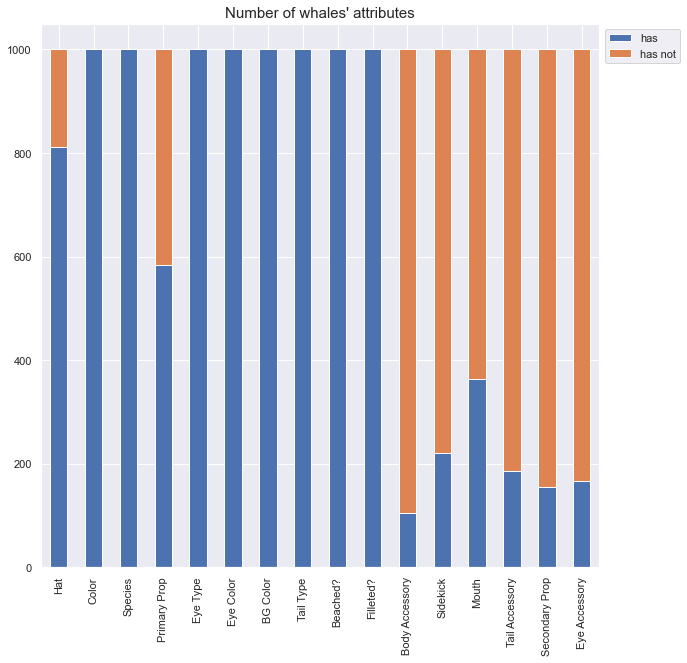

In [23]:
df_helping = df.iloc[:,4:-1]
df_helping[df_helping != 'None'] = 1
df_helping[df_helping == 'None'] = 0
df_helping = df_helping.apply(pd.to_numeric)
df_helping = df_helping.apply(pd.Series.value_counts)
df_helping = df_helping.iloc[::-1]
ax = df_helping.T.plot(kind='bar', stacked=True, figsize=(10,10))
ax.legend(["has", "has not"], bbox_to_anchor=(1.0, 1.0))
ax.set_title("Number of whales' attributes", fontsize=15)

8 of 16 attributes are optional and not every whale have to have it. Body accesory and Secondary Prop are the rarest attributes occuring in this dataset.

### Pie charts of chosen attributes

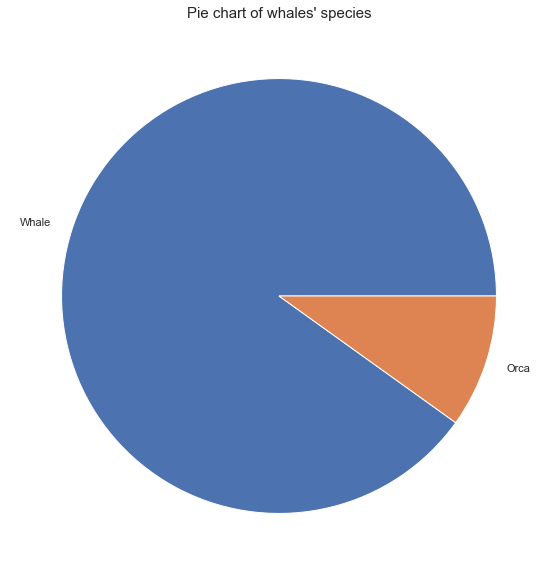

In [24]:
ax = df.iloc[:, 6].value_counts().plot.pie(figsize=(10,10))
ax.set_title("Pie chart of whales' species", fontsize=15)
plt.ylabel('')
plt.show()

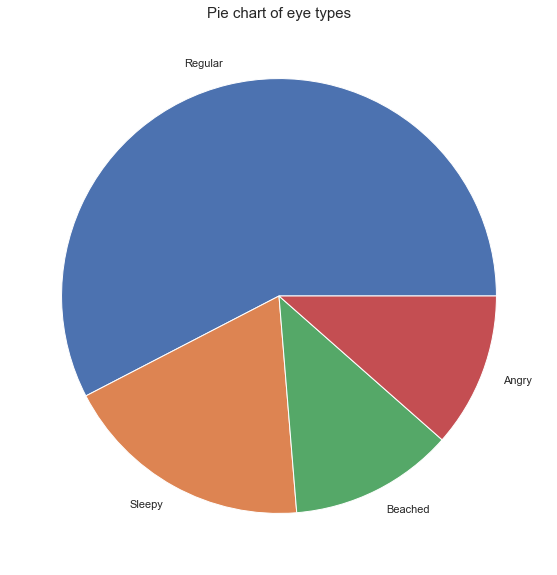

In [25]:
ax = df.iloc[:, 8].value_counts().plot.pie(figsize=(10,10))
ax.set_title("Pie chart of eye types", fontsize=15)
plt.ylabel('')
plt.show()

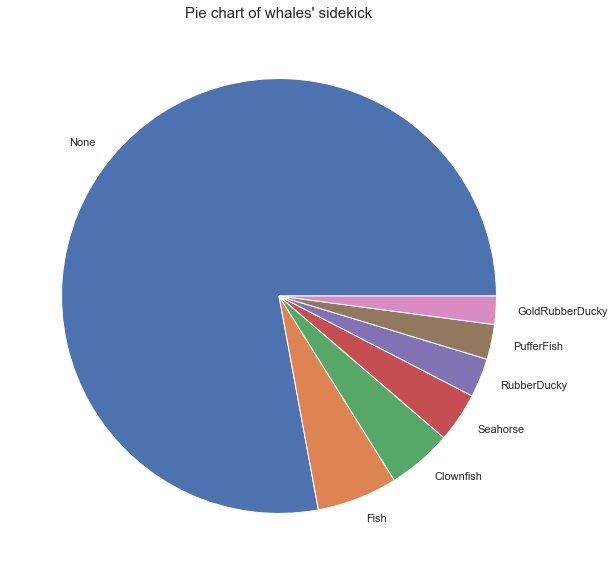

In [26]:
ax = df.iloc[:, 15].value_counts().plot.pie(figsize=(10,10))
ax.set_title("Pie chart of whales' sidekick", fontsize=15)
plt.ylabel('')
plt.show()

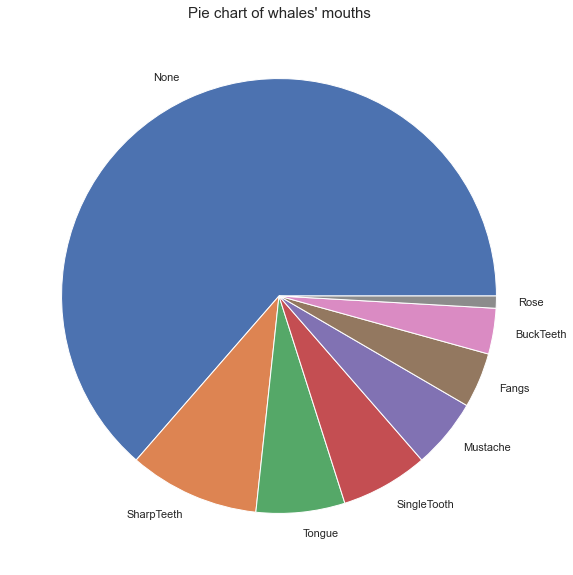

In [27]:
ax = df.iloc[:, 16].value_counts().plot.pie(figsize=(10,10))
ax.set_title("Pie chart of whales' mouths", fontsize=15)
plt.ylabel('')
plt.show()

## Creating table with transactions

In [28]:
t_id = []
time = []
price = []
currency = []
log = []
for msg in good_mess:
    
    if "execute_order" in msg['exe_msg'].keys():
        
        msg_order = msg['exe_msg']['execute_order']['order']['order']
        
        if 'nft' in msg_order['maker_asset']['info'].keys():
            t_id.append(msg_order['maker_asset']['info']['nft']['token_id'])
            time.append(msg['timestamp'])
            price.append(int(msg_order['taker_asset']['amount']))
            currency.append(msg_order['taker_asset']['info']['native_token']['denom'])
            log.append(msg['log'])
            
        if 'nft' in msg_order['taker_asset']['info'].keys():
            t_id.append(msg_order['taker_asset']['info']['nft']['token_id'])
            time.append(msg['timestamp'])
            price.append(int(msg_order['maker_asset']['amount']))
            currency.append(msg_order['maker_asset']['info']['native_token']['denom'])
            log.append(msg['log'])
            
transactions = pd.DataFrame(
    {'token_id': t_id,
     'time': time,
     'price': price,
     'currency': currency,
     'log': log
    })

In [29]:
# check if all prices are in uluna currency and if there are no nan values
print(len(set(list(transactions.currency))) == 1)
check_for_nan = transactions['price'].isnull().values.any()
print(check_for_nan)

True
False


In [30]:
# changing currency from uluna to luna
transactions['price'] = transactions['price'].div(1000000)
transactions = transactions.assign(currency='luna')
transactions

token_id                  time  price  \
0    268224242977843589559137290490891075916  2021-10-28T06:51:35Z   80.0   
1    133210027612502610499694900920944196609  2021-10-28T06:47:37Z   38.0   
2    268224242977843589559137290490891075916  2021-10-28T04:48:00Z   50.0   
3    259591475952441437071923564002783930322  2021-10-28T03:37:35Z   50.0   
4    135373932179507365345427771904264839526  2021-10-28T03:11:13Z   38.0   
..                                       ...                   ...    ...   
549  139621590672445192521436487002979291304  2021-10-12T17:23:57Z  149.0   
550  111198211705347563535897385756665112226  2021-10-12T17:22:58Z  150.0   
551  128151525273825821293592383919082729383  2021-10-12T17:22:30Z  100.0   
552  128151525273825821293592383919082729383  2021-10-12T17:22:23Z  100.0   
553  128151525273825821293592383919082729383  2021-10-12T17:22:23Z  100.0   

    currency                                                log  
0       luna  [{"events":[{"type":"coin_received","attribute...  
1       luna  [{"events":[{"type":"coin_received","attribute...  
2       luna  [{"events":[{"type":"coin_received","attribute...  
3       luna  [{"events":[{"type":"coin_received","attribute...  
4       luna  [{"events":[{"type":"coin_received","attribute...  
..       ...                                                ...  
549     luna  [{"events":[{"type":"coin_received","attribute...  
550     luna  [{"events":[{"type":"coin_received","attribute...  
551     luna  failed to execute message; message index: 1: G...  
552     luna  failed to execute message; message index: 1: G...  
553     luna  [{"events":[{"type":"coin_received","attribute...  

[554 rows x 5 columns]

To the transaction table we added column with log values to check which transactions finished successfully and which failed. We leave only transactions which finished successfully and after that we delete log column as it is no longer necessary. 

In [31]:
transactions = transactions[~transactions.log.str.contains("failed to execute message")]
transactions

token_id                  time  price  \
0    268224242977843589559137290490891075916  2021-10-28T06:51:35Z   80.0   
1    133210027612502610499694900920944196609  2021-10-28T06:47:37Z   38.0   
2    268224242977843589559137290490891075916  2021-10-28T04:48:00Z   50.0   
3    259591475952441437071923564002783930322  2021-10-28T03:37:35Z   50.0   
4    135373932179507365345427771904264839526  2021-10-28T03:11:13Z   38.0   
..                                       ...                   ...    ...   
547   16554400566941331707990648289402224605  2021-10-12T17:24:10Z  135.0   
548  228644559127842003713497305877093511287  2021-10-12T17:24:03Z  150.0   
549  139621590672445192521436487002979291304  2021-10-12T17:23:57Z  149.0   
550  111198211705347563535897385756665112226  2021-10-12T17:22:58Z  150.0   
553  128151525273825821293592383919082729383  2021-10-12T17:22:23Z  100.0   

    currency                                                log  
0       luna  [{"events":[{"type":"coin_received","attribute...  
1       luna  [{"events":[{"type":"coin_received","attribute...  
2       luna  [{"events":[{"type":"coin_received","attribute...  
3       luna  [{"events":[{"type":"coin_received","attribute...  
4       luna  [{"events":[{"type":"coin_received","attribute...  
..       ...                                                ...  
547     luna  [{"events":[{"type":"coin_received","attribute...  
548     luna  [{"events":[{"type":"execute_contract","attrib...  
549     luna  [{"events":[{"type":"coin_received","attribute...  
550     luna  [{"events":[{"type":"coin_received","attribute...  
553     luna  [{"events":[{"type":"coin_received","attribute...  

[535 rows x 5 columns]

In [32]:
transactions = transactions[["token_id", "time", "price", "currency"]]
transactions['time'] = pd.to_datetime(transactions['time'])
transactions

<ipython-input-32-4c79fa49cc07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['time'] = pd.to_datetime(transactions['time'])


token_id                      time  price  \
0    268224242977843589559137290490891075916 2021-10-28 06:51:35+00:00   80.0   
1    133210027612502610499694900920944196609 2021-10-28 06:47:37+00:00   38.0   
2    268224242977843589559137290490891075916 2021-10-28 04:48:00+00:00   50.0   
3    259591475952441437071923564002783930322 2021-10-28 03:37:35+00:00   50.0   
4    135373932179507365345427771904264839526 2021-10-28 03:11:13+00:00   38.0   
..                                       ...                       ...    ...   
547   16554400566941331707990648289402224605 2021-10-12 17:24:10+00:00  135.0   
548  228644559127842003713497305877093511287 2021-10-12 17:24:03+00:00  150.0   
549  139621590672445192521436487002979291304 2021-10-12 17:23:57+00:00  149.0   
550  111198211705347563535897385756665112226 2021-10-12 17:22:58+00:00  150.0   
553  128151525273825821293592383919082729383 2021-10-12 17:22:23+00:00  100.0   

    currency  
0       luna  
1       luna  
2       luna  
3       luna  
4       luna  
..       ...  
547     luna  
548     luna  
549     luna  
550     luna  
553     luna  

[535 rows x 4 columns]

# Data analysis - part 2

In [33]:
transactions_table = transactions

In [34]:
transactions_table.sort_values(by=['token_id'])

token_id                      time  price  \
118  100087791541636968167061770173200535623 2021-10-16 10:30:18+00:00   89.0   
507  100119371501889357363188090365430324045 2021-10-12 17:40:37+00:00   90.0   
346   10030442374927997889741165565853639228 2021-10-12 22:43:51+00:00   94.0   
488   10030442374927997889741165565853639228 2021-10-12 17:54:48+00:00   88.0   
537  100440850726946449055533930427001487615 2021-10-12 17:28:30+00:00  119.0   
..                                       ...                       ...    ...   
414   96805822462153211528372676714602076131 2021-10-12 19:08:00+00:00   68.0   
197   96805822462153211528372676714602076131 2021-10-13 19:32:06+00:00   79.0   
73    97131347778994977963927165346633935672 2021-10-19 10:32:27+00:00   55.0   
194   97131347778994977963927165346633935672 2021-10-13 19:40:11+00:00   85.0   
496   99467187835815848128007356405889725823 2021-10-12 17:50:23+00:00   79.0   

    currency  
118     luna  
507     luna  
346     luna  
488     luna  
537     luna  
..       ...  
414     luna  
197     luna  
73      luna  
194     luna  
496     luna  

[535 rows x 4 columns]

In the transactions table there are several transactions for some token_ids. It means that some NFTs weren't sold once, they were on market multiple times. 

First, for our analysis we take only the latest transaction for each token_id, so we cut out 'duplicates'.

In [35]:
transactions_no_duplicates = transactions_table.sort_values(by=['time'])

In [36]:
transactions_no_duplicates = transactions_no_duplicates.drop_duplicates(subset='token_id', keep = 'last')
sum(transactions_no_duplicates.token_id.value_counts())

401

In [37]:
all_data = df.merge(transactions_no_duplicates, on='token_id')
all_data

token_id  \
0     93091297589663042301185757942324687666   
1    187445413553592199561065748013726825223   
2    217051057542981952204586371033378002195   
3     79906611142633170565926506233572856562   
4      9549677754527740718391299491097796395   
..                                       ...   
396  128934493960485131574819833707053000609   
397  126451395828183672512116915482086312555   
398  302088139186058489592901832491445663399   
399  293066599461236822889087934216455201952   
400  270727292345824395915585597472415958421   

                                             token_uri  \
0    ipfs://QmWzFu59DmHkAvhqVxukqtR6rMHCQ2a9WqbNsXk...   
1    ipfs://QmV7x7fGp6YVRyiaobTKTvaPMnhVCZg8i3m3iao...   
2    ipfs://QmW9qUv7X9PypZc6a9UnGgeoEGDGgmYZETtNs4D...   
3    ipfs://QmcTiGYENAvBKkR4PfQmu1JEFQr13p3RGU1KcKs...   
4    ipfs://QmTqpTeEKdudYmBghbmwWaR8gRPfM51Z2f96ow6...   
..                                                 ...   
396  ipfs://QmdEBBDK3C8yGVtRkNLGix4gdepvvXSvxJBezYz...   
397  ipfs://QmV6KuYinbEAT4hcE5Re2WzWWKxsiy62KnY4sqC...   
398  ipfs://QmafkNWBNDcnrzvWHK8gUgTbuWtUaLHnxmAnowT...   
399  ipfs://QmPjXReXarMbqEuFJFYXXxSwGB299EnrBve4Zqj...   
400  ipfs://QmVL4oTSp3vXdet3GUejA34XqBLGfdREt4tTSQA...   

                                                 image        name  \
0    ipfs://QmRvMK2Kzuzq5jqAkKBaLKrtbMNwuneHRT98NyU...  Whale #967   
1    ipfs://QmQymUrY4Qgv7Wj9KqBqowmMHDeYUx5Xv7wJuU3...   Whale #55   
2    ipfs://QmUZCkUD87mmDEL1aSQqWfSkNb22GzBYwpiGjG3...  Whale #922   
3    ipfs://QmYM21j7UcbAA5bT7U7usqKHzCmEKNNXD5xJWE9...  Whale #758   
4    ipfs://QmWMocoDrA4583qqqxkrWGSDWsTu6djdjCZo9UU...  Whale #851   
..                                                 ...         ...   
396  ipfs://Qmd8gFwCnjjViC1wTXJKjJRgDUExDjaZWzUxRwS...  Whale #607   
397  ipfs://QmWi9gtpM7RBzsjvCjmfnirpFrwHBDAG9HKyi9d...  Whale #590   
398  ipfs://QmUko8Vgzx41Y93BVBAKn6K8QkEgRcoRUBd6QcN...  Whale #249   
399  ipfs://QmaGMwxgQmzX1vNHjYuNGNNwTwgo6Z2Af3qq83r...  Whale #156   
400  ipfs://QmRbWXTVQB32EQpxEESZtKCQTCyoCQV9kV6YHL4...  Whale #763   

                Hat                  Color Species Primary Prop Eye Type  \
0     MowhawkPurple             Glow Green   Whale     Popsicle    Angry   
1        MowhawkRed          Black / Black   Whale         None  Regular   
2              None            Glow Purple   Whale         None  Regular   
3              None         Yellow / White   Whale  PirateSword  Regular   
4      Construction          Black / White    Orca          Saw  Regular   
..              ...                    ...     ...          ...      ...   
396            None           Blue / White   Whale   TridentRed  Regular   
397            None            Blue / Blue   Whale         None  Regular   
398            None       Grey Camo / Grey   Whale    SmokePipe   Sleepy   
399        LazerGun            Grey / Grey   Whale         None  Regular   
400  HeavyArtillery  Purple / Light Purple   Whale         None    Angry   

     Eye Color  ... Body Accessory   Sidekick        Mouth    Tail Accessory  \
0        Black  ...           None       None         None              None   
1    LaserEyes  ...           None   Seahorse         None              None   
2        Black  ...           None   Seahorse         None              None   
3        Black  ...           None  Clownfish         None              None   
4        Black  ...           None       None         None              None   
..         ...  ...            ...        ...          ...               ...   
396      Black  ...           None  Clownfish   SharpTeeth  RoseGoldTailRing   
397      Black  ...           None       None  SingleTooth              None   
398      Black  ...           None       None         None    TailRingSilver   
399      Black  ...           None       None         None              None   
400      Black  ...           None       None        Fangs    TailRingSilver   

    Secondary Prop Eye Accessory rarity_score  

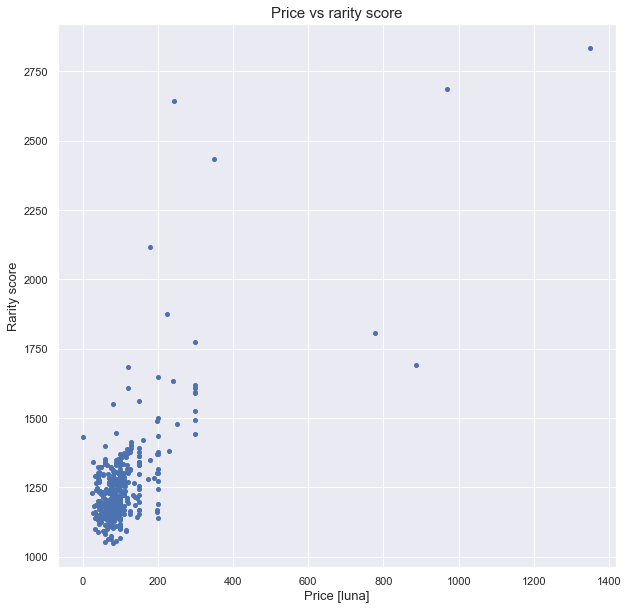

In [38]:
plt.plot(all_data['price'],all_data['rarity_score'],'o', markersize=4)
plt.gcf().set_size_inches(10, 10)
plt.title('Price vs rarity score', fontsize=15)
plt.xlabel("Price [luna]", fontsize=13)
plt.ylabel('Rarity score', fontsize=13)
plt.show()


C:\Users\powie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

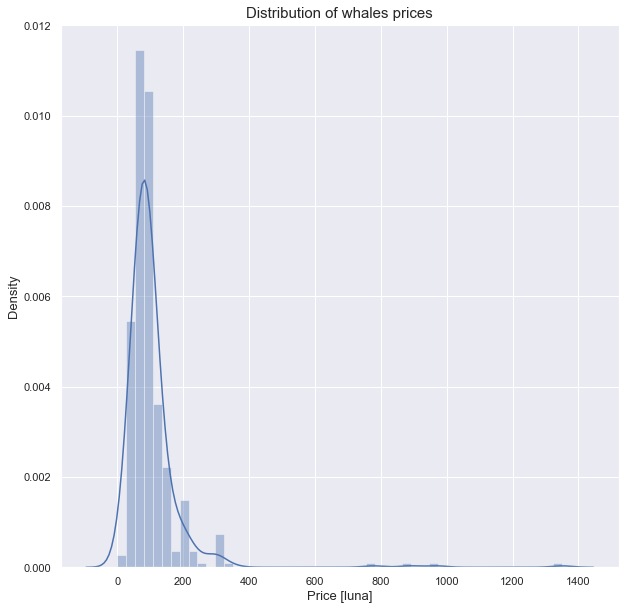

In [39]:
p = sns.distplot(all_data['price'])
plt.gcf().set_size_inches(10, 10)
p.axes.set_title('Distribution of whales prices',fontsize=15)
p.set_xlabel("Price [luna]",fontsize=13)
p.set_ylabel("Density",fontsize=13)

Text(0.5, 1.0, 'Boxplot of whales prices')

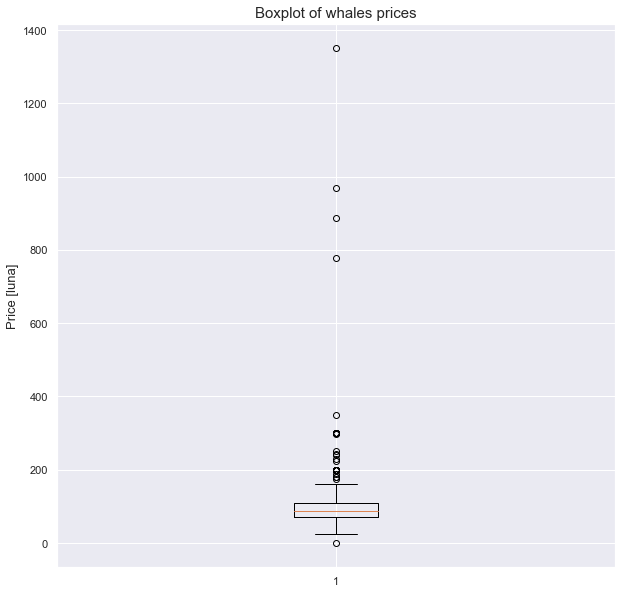

In [40]:
plt.boxplot(all_data['price'])
plt.gcf().set_size_inches(10, 10)
plt.ylabel("Price [luna]",fontsize=13)
plt.title("Boxplot of whales prices",fontsize=15)

Text(0.5, 1.0, 'Boxplots of whales prices grouped by species')

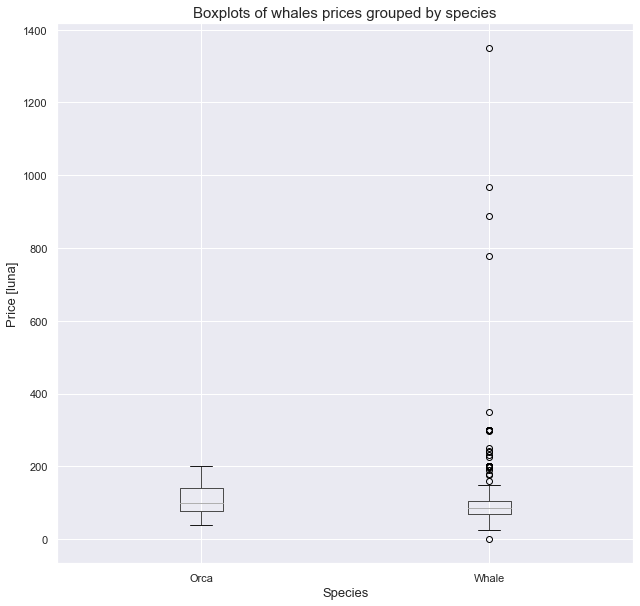

In [41]:
all_data.boxplot(column=['price'], by='Species')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('Species',fontsize=13)
plt.ylabel('Price [luna]',fontsize=13)
plt.suptitle('')
plt.title('Boxplots of whales prices grouped by species',fontsize=15)

Text(0.5, 1.0, 'Boxplots of whales prices grouped by eye types')

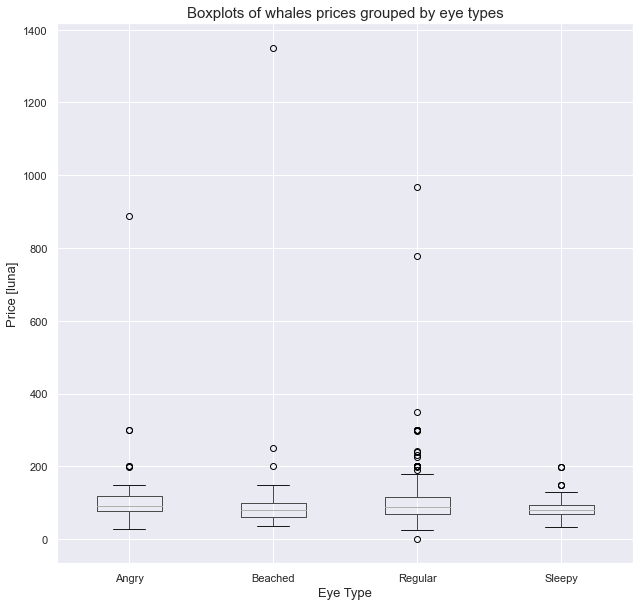

In [42]:
all_data.boxplot(column=['price'], by='Eye Type')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('Eye Type',fontsize=13)
plt.ylabel('Price [luna]',fontsize=13)
plt.suptitle('')
plt.title('Boxplots of whales prices grouped by eye types',fontsize=15)

## Summary

It was necessary to add restarting session and time sleep while data downloading, because without it the frequency of request was too high and we couldn't get the data.

In the TerraWhales collection most of NFTs have price between 0 and 200 luna. 
 
With our model the most expensive whale has the highest rarity score.

There are only a few rare and expensive pictures in this collection.

When we group collection by its species we can see on the boxplots that in whale species there are the biggest differences in prices.

